<a href="https://colab.research.google.com/github/s44ths/Data-mining/blob/main/Happy_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Влияние различных факторов на счастье людей
X1 - X6 имеют значения от 1 до 5
D - счастлив (1) или несчастлив (0)
X1 - Доступность информации о городских службах
X2 - Оценка стоимости и доступности жилья
X3 - Оценка качества государственных школ
X4 - Доверие опрашиваемого к местной полиции
X5 - Оценка качества содержания улиц и тротуаров
X6 - Оценка доступности общественных мероприятий

In [ ]:
from sklearn import datasets
import pandas as pd

In [ ]:
wine_df = datasets.load_wine()
pd.DataFrame(wine_df.data [:5], columns = wine_df.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
wine_df.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine_df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
from sklearn.preprocessing import scale
data = scale(wine_df.data)

In [ ]:
x_axis = data[:, 0]   # alcohol
y_axis = data[:, 6]   # flavanoids
z_axis = data[:, 12]  # proline

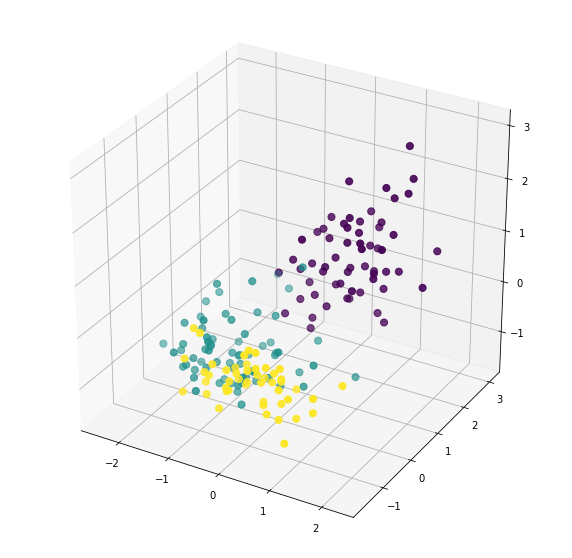

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_axis, y_axis, z_axis, c = wine_df.target, s = 50)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


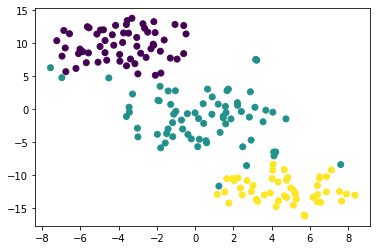

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=30)
transformed = model.fit_transform(data)

x1_axis = transformed[:, 0]
y1_axis = transformed[:, 1]

plt.scatter(x1_axis, y1_axis, c=wine_df.target)
plt.show()

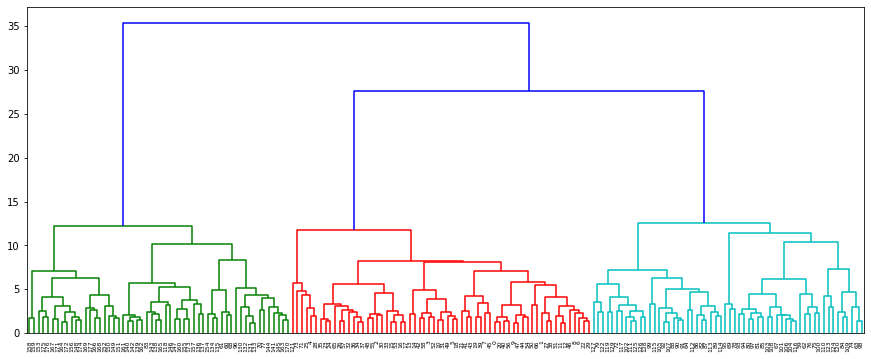

In [ ]:
fig = plt.figure(figsize = (15, 6))

from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(data,  method='ward')
dendrogram(mergings,
            leaf_rotation=90,leaf_font_size=6, color_threshold=20)
plt.show()

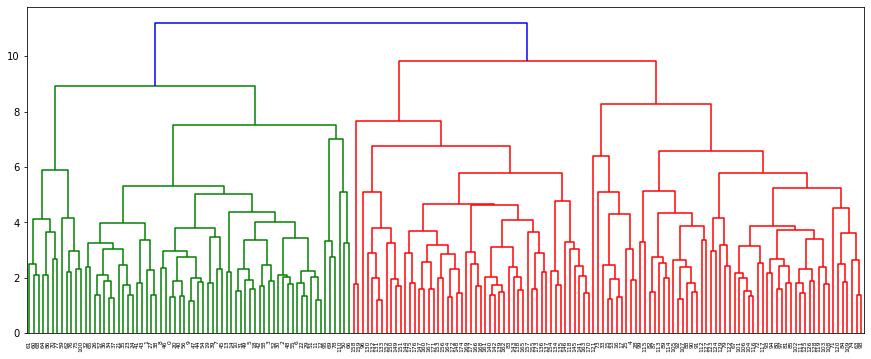

In [ ]:
fig = plt.figure(figsize = (15, 6))
mergings1 = linkage(data,  method='complete')
dendrogram(mergings1,
            leaf_rotation=90,leaf_font_size=6, color_threshold=10)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,  linkage = 'ward')
y_hc = hc.fit_predict(data)
from sklearn import metrics
metrics.silhouette_score(data, y_hc)

0.2774439826952266

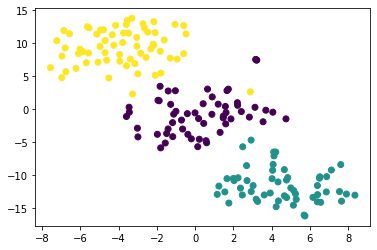

In [ ]:
plt.scatter(x1_axis, y1_axis, c=y_hc)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(data)

KMeans(n_clusters=3)

In [ ]:
all_predictions = model.predict(data)
all_predictions # 2 = class0, 1 = class2, 0 = class1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

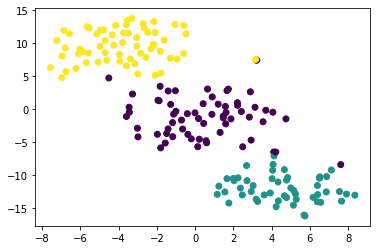

In [ ]:
plt.scatter(x1_axis, y1_axis, c=all_predictions)
plt.show()

In [ ]:
metrics.silhouette_score(data, all_predictions, metric='euclidean') 

0.2848589191898987

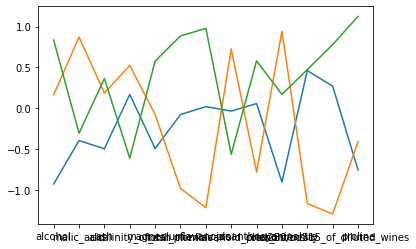

In [ ]:
x_l=wine_df.feature_names
plt.plot(x_l,d[0])
plt.plot(x_l,d[1])
plt.plot(x_l,d[2])
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.3)
dbscan.fit(data)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0, -1,  0,
       -1, -1, -1, -1,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0,  0,  1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1])

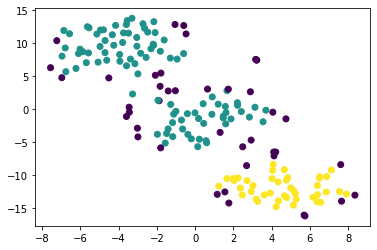

In [ ]:
plt.scatter(x1_axis, y1_axis, c=dbscan.labels_)
plt.show()